In [1]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
%matplotlib inline

In [5]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission_gfvA5FD.csv to sample_submission_gfvA5FD.csv
Saving test_tweets_anuFYb8.csv to test_tweets_anuFYb8.csv
Saving train_E6oV3lV.csv to train_E6oV3lV.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission_gfvA5FD.csv to sample_submission_gfvA5FD.csv
Saving test_tweets_anuFYb8.csv to test_tweets_anuFYb8.csv


In [6]:
train  = pd.read_csv('train_E6oV3lV.csv') 
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [7]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [8]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [9]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [10]:
train.shape

(31962, 3)

In [11]:
test.shape

(17197, 2)

In [12]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [13]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


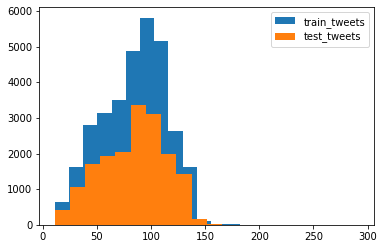

In [14]:
length_train = train['tweet'].str.len() 
length_test = test['tweet'].str.len() 
plt.hist(length_train, bins=20, label="train_tweets") 
plt.hist(length_test, bins=20, label="test_tweets") 
plt.legend() 
plt.show()

In [15]:
length_train

0        102
1        122
2         21
3         86
4         39
        ... 
31957     68
31958    131
31959     63
31960     67
31961     32
Name: tweet, Length: 31962, dtype: int64

In [16]:
length_test

0         90
1        101
2         71
3        142
4         93
        ... 
17192    108
17193     96
17194    145
17195    104
17196     64
Name: tweet, Length: 17197, dtype: int64

In [17]:
combi = train.append(test, ignore_index=True) 
combi.shape

(49159, 3)

In [18]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [19]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [20]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


In [21]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [22]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [23]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [ ]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 

In [24]:
tokenized_tweet

0                                                           [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1                                               [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                                                                [bihday, your, majesty]
3                                                                                                       [#model, love, take, with, time]
4                                                                                                     [factsguide, society, #motivation]
                                                                      ...                                                               
49154                         [thought, factory, left, right, polarisation, #trump, #uselections, #leadership, #politics, #brexit, #blm]
49155                                    

In [25]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combi['tidy_tweet'] = tokenized_tweet

In [26]:
tokenized_tweet

0                                                     when father dysfunctional selfish drags kids into dysfunction #run
1                                          thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2                                                                                                    bihday your majesty
3                                                                                             #model love take with time
4                                                                                         factsguide society #motivation
                                                              ...                                                       
49154                     thought factory left right polarisation #trump #uselections #leadership #politics #brexit #blm
49155                                feeling like mermaid #hairflip #neverready #formal #wedding #gown #dresses #mermaid
49156    #hillary #campaigned to

In [27]:
combi

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,thought factory left right polarisation #trump #uselections #leadership #politics #brexit #blm
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,feeling like mermaid #hairflip #neverready #formal #wedding #gown #dresses #mermaid
49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",#hillary #campaigned today #ohio used words like assets liability never once #clinton thee word #radicalization
49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",happy work conference right mindset leads culture development organizations #work #mindset


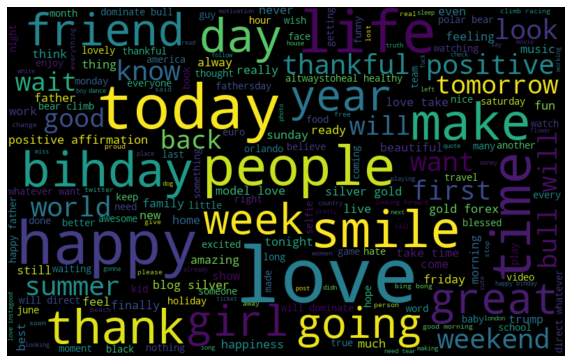

In [28]:
all_words = ' '.join([text for text in combi['tidy_tweet']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

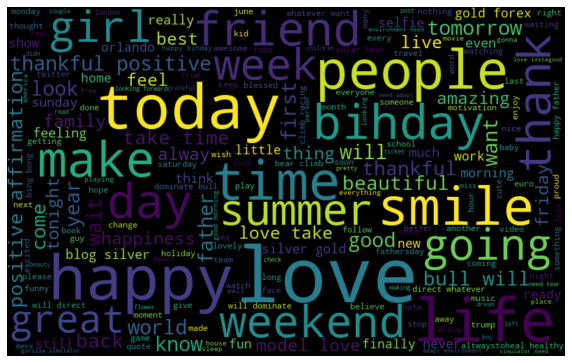

In [29]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

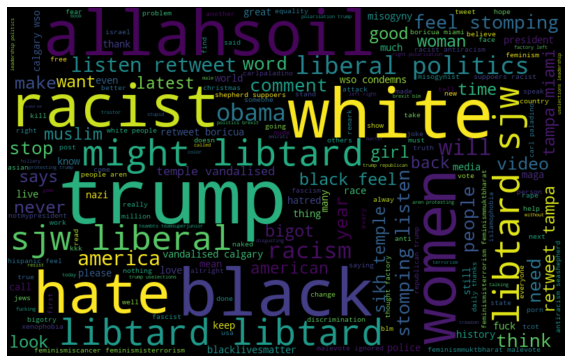

In [30]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [31]:
# function to collect hashtags 
def hashtag_extract(x):    
  hashtags = []    # Loop over the words in the tweet    
  for i in x:        
    ht = re.findall(r"#(\w+)", i)        
    hashtags.append(ht)     
  return hashtags

In [32]:
# extracting hashtags from non racist/sexist tweets 
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0]) 
# extracting hashtags from racist/sexist tweets 
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1]) 
# unnesting list 
HT_regular = sum(HT_regular,[]) 
HT_negative = sum(HT_negative,[])

In [33]:
HT_regular

['run',
 'lyft',
 'disapointed',
 'getthanked',
 'model',
 'motivation',
 'allshowandnogo',
 'school',
 'exams',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl',
 'allin',
 'cavs',
 'champions',
 'cleveland',
 'clevelandcavaliers',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshooting',
 'orlandoshooting',
 'biggerproblems',
 'selfish',
 'heabreaking',
 'values',
 'love',
 'gettingfed',
 'got',
 'junior',
 'yugyoem',
 'omg',
 'thankful',
 'positive',
 'friday',
 'cookies',
 'euro',
 'badday',
 'coneofshame',
 'cats',
 'pissed',
 'funny',
 'laughs',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssas',
 'love',
 'smiles',
 'media',
 'pressconference',
 'antalya',
 'turkey',
 'throwback',
 'ica',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevibes',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift',
 'travelingram',
 'dalat',
 'ri

In [34]:
HT_negative

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphins',
 'thecove',
 'helpcovedolphins',
 'neverump',
 'xenophobia',
 'love',
 'peace',
 'race',
 'identity',
 'med',
 'altright',
 'whitesupremacy',
 'linguistics',
 'race',
 'power',
 'raciolinguistics',
 'brexit',
 'people',
 'trump',
 'republican',
 'michelleobama',
 'knicks',
 'golf',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liberal',
 'politics',
 'trash',
 'hate',
 'stereotyping',
 'prejudice',
 'hope',
 'hate',
 'conflict',
 'pols',
 'bluelivesmatter',
 'draintheswamp',
 'ferguson',
 'antisemitism',
 'hocoschools',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatred',
 'bigotry',
 'libtard',
 'sjw',
 'liberal',
 'politics',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatter',
 'ushistory',
 'eugenics',
 'biherism',
 'bigotry',
 'altright',
 'potus',
 'theresistance',
 'crime',
 'officer',
 'black',
 'retweet',
 'tampa',
 'miami',
 'allahsoil',
 'praised',
 'cleveland',
 'rnc',
 'white',
 'tamirrice

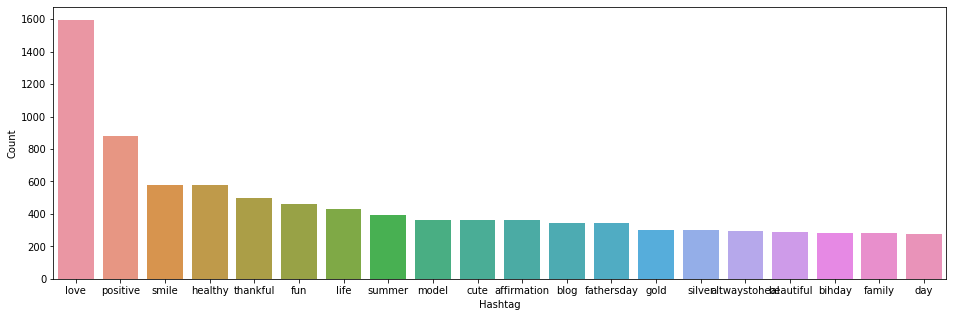

In [35]:
a = nltk.FreqDist(HT_regular) 
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()


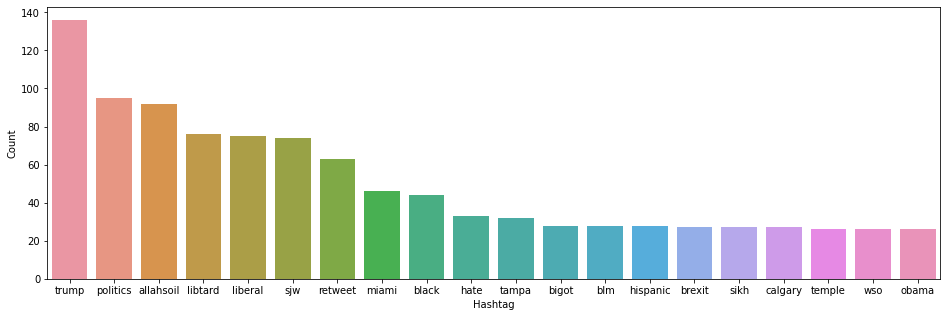

In [36]:
b = nltk.FreqDist(HT_negative) 
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())}) 
# selecting top 20 most frequent hashtags 
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

In [38]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
bow = bow_vectorizer.fit_transform(combi['tidy_tweet']) 
bow.shape

(49159, 1000)

In [ ]:
bow

<49159x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 191502 stored elements in Compressed Sparse Row format>

In [39]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet']) 
tfidf.shape

(49159, 1000)

In [40]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 



In [41]:
model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(6479686, 7536020)

In [42]:
model_w2v.wv.most_similar(positive="dinner")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('lamb', 0.609839916229248),
 ('burritos', 0.6079835295677185),
 ('noodle', 0.5918803215026855),
 ('spaghetti', 0.5830626487731934),
 ('alfredo', 0.5785531997680664),
 ('#avocado', 0.5714197754859924),
 ('desse', 0.5699053406715393),
 ('enroute', 0.5667636394500732),
 ('#tacotuesday', 0.5619158744812012),
 ('lukey', 0.5585575699806213)]

In [43]:
model_w2v.wv.most_similar(positive="trump")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('donald', 0.5918899178504944),
 ('unfavorability', 0.544548749923706),
 ('chopra', 0.540471076965332),
 ('commie', 0.522247314453125),
 ('nominee', 0.5198952555656433),
 ('suppoer', 0.5198686122894287),
 ('hillary', 0.5196329355239868),
 ('irrefutable', 0.5121859908103943),
 ('unstable', 0.5119253396987915),
 ('#delegaterevolt', 0.5088860988616943)]

In [44]:
model_w2v['food']

array([ 0.9959887 ,  0.17686017,  0.0813186 ,  0.0546257 ,  0.5019526 ,
       -0.07677499,  0.16317615, -1.1168396 ,  0.694805  , -0.01346762,
       -0.33980554, -0.00953169, -0.55419415,  0.536385  ,  0.12140515,
        0.23464678, -0.5961039 , -0.27609682, -0.73580134, -0.48094538,
       -0.31273976, -0.11562934, -0.26218414,  0.09349266,  0.21707232,
       -0.25177786, -0.50161695,  0.4044623 ,  0.03598952, -0.19959424,
        0.08545403,  0.09999895,  0.4220977 ,  0.2906866 ,  0.38212448,
       -0.27958837,  0.21536909, -1.140333  ,  0.2156801 ,  0.2373169 ,
        0.35253596, -0.21318495, -0.9203943 , -1.2550853 ,  0.17525439,
        0.43552953,  0.12603149, -0.93399376,  0.07162105,  0.62111443,
       -0.50181   ,  0.44658113, -0.19837269,  0.46398148, -0.12190773,
        0.01512446, -0.08046208, -0.39997846, -0.23216309, -0.31212476,
        0.47228697, -0.5144295 , -0.00792433,  0.14098327,  0.32131287,
       -0.11238255, -0.48457053, -0.42328277, -0.10099881,  0.57

In [49]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
      try:
        vec += model_w2v[word].reshape((1, size))
        count += 1.
      except KeyError:
        continue
    if count != 0:
      vec /= count
    return vec

In [51]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
  wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
  wordvec_df = pd.DataFrame(wordvec_arrays) 
  wordvec_df.shape

In [53]:
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

In [54]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output
labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [55]:
labeled_tweets

[LabeledSentence(words=['when', 'father', 'dysfunctional', 'selfish', 'drags', 'kids', 'into', 'dysfunction', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thanks', '#lyft', 'credit', 'cause', 'they', 'offer', 'wheelchair', 'vans', '#disapointed', '#getthanked'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 LabeledSentence(words=['factsguide', 'society', '#motivation'], tags=['tweet_4']),
 LabeledSentence(words=['huge', 'fare', 'talking', 'before', 'they', 'leave', 'chaos', 'disputes', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5']),
 LabeledSentence(words=['camping', 'tomorrow', 'danny'], tags=['tweet_6']),
 LabeledSentence(words=['next', 'school', 'year', 'year', 'exams', 'think', 'about', 'that', '#school', '#exams', '#hate', '#imagine', '#actorslife', '#revolutionschool', '#girl'], tags=['tweet_7']),
 LabeledSentence(words=['lov

In [56]:
labeled_tweets[:6]

[LabeledSentence(words=['when', 'father', 'dysfunctional', 'selfish', 'drags', 'kids', 'into', 'dysfunction', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thanks', '#lyft', 'credit', 'cause', 'they', 'offer', 'wheelchair', 'vans', '#disapointed', '#getthanked'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 LabeledSentence(words=['factsguide', 'society', '#motivation'], tags=['tweet_4']),
 LabeledSentence(words=['huge', 'fare', 'talking', 'before', 'they', 'leave', 'chaos', 'disputes', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

In [57]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model                                   dm_mean=1, # dm = 1 for using mean of the context word vectors                                  size=200, # no. of desired features                                  
window=5, # width of the context window                                  
negative=7, # if > 0 then negative sampling will be used                                 min_count=5, # Ignores all words with total frequency lower than 2.                                  
workers=3, # no. of cores                                  
alpha=0.1, # learning rate                                  
seed = 23) 

In [58]:
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

100%|██████████| 49159/49159 [00:00<00:00, 1935781.12it/s]


In [59]:
model_d2v

In [60]:
model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

In [61]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200)) 

In [67]:
docvec_arrays.ndim

2

In [68]:
docvec_arrays.shape

(49159, 200)

In [63]:
model_d2v.docvecs[0].shape

(100,)

In [76]:
docvec_df = pd.DataFrame(docvec_arrays) 

In [77]:
docvec_df.shape

(49159, 200)

In [78]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score


In [82]:
# Extracting train and test BoW features 
train_bow = bow[:31962,:] 
test_bow = bow[31962:,:] 
# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],                                                            random_state=42,                                                           test_size=0.3)
lreg = LogisticRegression() 
# training the model 
lreg.fit(xtrain_bow, ytrain) 
prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set 
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.5017421602787456

In [84]:
prediction

array([[9.99400902e-01, 5.99098356e-04],
       [9.82233902e-01, 1.77660975e-02],
       [9.78138093e-01, 2.18619071e-02],
       ...,
       [9.45090512e-01, 5.49094883e-02],
       [9.39621829e-01, 6.03781712e-02],
       [9.63452798e-01, 3.65472025e-02]])

In [85]:
test_pred = lreg.predict_proba(test_bow) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']] 
submission.to_csv('sub_lreg_bow.csv', index=False)

In [86]:
from google.colab import files
files.download("sub_lreg_bow.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [87]:
train_tfidf = tfidf[:31962,:] 
test_tfidf = tfidf[31962:,:] 
xtrain_tfidf = train_tfidf[ytrain.index] 
xvalid_tfidf = train_tfidf[yvalid.index]
lreg.fit(xtrain_tfidf, ytrain) 
prediction = lreg.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.5091240875912408

In [89]:
test_predT = lreg.predict_proba(test_tfidf) 
test_pred_intTF = test_predT[:,1] >= 0.3 
test_pred_intTF = test_pred_intTF.astype(np.int) 
test['label'] = test_pred_intTF 
submission = test[['id','label']] 
submission.to_csv('sub_lreg_bowTF.csv', index=False)

In [90]:
from google.colab import files
files.download("sub_lreg_bowTF.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [91]:
train_w2v = wordvec_df.iloc[:31962,:] 
test_w2v = wordvec_df.iloc[31962:,:] 
xtrain_w2v = train_w2v.iloc[ytrain.index,:] 
xvalid_w2v = train_w2v.iloc[yvalid.index,:]
lreg.fit(xtrain_w2v, ytrain) 
prediction = lreg.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.6031507876969243

In [92]:
test_predW= lreg.predict_proba(test_w2v) 
test_pred_intWV = test_predW[:,1] >= 0.3 
test_pred_intWV = test_pred_intWV.astype(np.int) 
test['label'] = test_pred_intWV 
submission = test[['id','label']] 
submission.to_csv('sub_lreg_bowWV.csv', index=False)

In [93]:
from google.colab import files
files.download("sub_lreg_bowWV.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [96]:
train_d2v = docvec_df.iloc[:31962,:] 
test_d2v = docvec_df.iloc[31962:,:] 
xtrain_d2v = train_d2v.iloc[ytrain.index,:] 
xvalid_d2v = train_d2v.iloc[yvalid.index,:]
lreg.fit(xtrain_d2v, ytrain) 
prediction = lreg.predict_proba(xvalid_d2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.0

In [97]:
from sklearn import svm


In [98]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain) 
prediction = svc.predict_proba(xvalid_bow) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.48423005565862715

In [99]:
test_pred = svc.predict_proba(test_bow) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']] 
submission.to_csv('sub_svm_bow.csv', index=False)

In [100]:
svc = svm.SVC(kernel='linear', 
C=1, probability=True).fit(xtrain_tfidf, ytrain) 
prediction = svc.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.4794776119402986

In [102]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain) 
prediction = svc.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.5925925925925926

In [103]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain) 
prediction = svc.predict_proba(xvalid_d2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.0

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain) 
prediction = rf.predict(xvalid_bow) 
# validation score 
f1_score(yvalid, prediction)

0.5216680294358136

In [107]:
test_pred = rf.predict(test_bow) 
test['label'] = test_pred 
submission = test[['id','label']] 

submission.to_csv('sub_rf_bow.csv', index=False)

In [108]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain) 
prediction = rf.predict(xvalid_tfidf) 
f1_score(yvalid, prediction)

0.5148698884758364

In [109]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain) 
prediction = rf.predict(xvalid_w2v) 
f1_score(yvalid, prediction)

0.5107296137339057

In [110]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain) 
prediction = rf.predict(xvalid_d2v) 
f1_score(yvalid, prediction)

0.0

In [111]:
from xgboost import XGBClassifier

In [112]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain) 
prediction = xgb_model.predict(xvalid_bow) 
f1_score(yvalid, prediction)

0.4775224775224775

In [113]:
test_pred = xgb_model.predict(test_bow) 
test['label'] = test_pred 
submission = test[['id','label']] 
submission.to_csv('sub_xgb_bow.csv', index=False)

In [114]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain) 
prediction = xgb.predict(xvalid_tfidf) 
f1_score(yvalid, prediction)

0.4862204724409449

In [115]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain) 
prediction = xgb.predict(xvalid_w2v) 
f1_score(yvalid, prediction)

0.6431159420289855

In [116]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_d2v, ytrain) 
prediction = xgb.predict(xvalid_d2v) 
f1_score(yvalid, prediction)

0.0

In [117]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_d2v, ytrain) 
prediction = xgb.predict(xvalid_d2v) 
f1_score(yvalid, prediction)

0.0

In [119]:
import xgboost as xgb

In [120]:
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain) 
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid) 
dtest = xgb.DMatrix(test_w2v)

In [121]:
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
 }

In [122]:
def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]

In [123]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10)
     for min_child_weight in range(5,8)
 ]
max_f1 = 0. # initializing with 0 
best_params = None 
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
     # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

     # Cross-validation
    cv_results = xgb.cv(        params,
        dtrain,        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )     

CV with max_depth=6, min_child_weight=5
CV with max_depth=6, min_child_weight=6
CV with max_depth=6, min_child_weight=7
CV with max_depth=7, min_child_weight=5
CV with max_depth=7, min_child_weight=6
CV with max_depth=7, min_child_weight=7
CV with max_depth=8, min_child_weight=5
CV with max_depth=8, min_child_weight=6
CV with max_depth=8, min_child_weight=7
CV with max_depth=9, min_child_weight=5
CV with max_depth=9, min_child_weight=6
CV with max_depth=9, min_child_weight=7


In [126]:
mean_f1 = cv_results['test-f1_score-mean'].max()

In [127]:
mean_f1

0.673965

In [130]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10)
     for min_child_weight in range(5,8)
 ]
max_f1 = 0. # initializing with 0 
best_params = None 
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
     # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

     # Cross-validation
    cv_results = xgb.cv(        params,
        dtrain,        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )     
# Finding best F1 Score
    
mean_f1 = cv_results['test-f1_score-mean'].max()
    
boost_rounds = cv_results['test-f1_score-mean'].argmax()    
print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))    
if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with max_depth=6, min_child_weight=5
CV with max_depth=6, min_child_weight=6
CV with max_depth=6, min_child_weight=7
CV with max_depth=7, min_child_weight=5
CV with max_depth=7, min_child_weight=6
CV with max_depth=7, min_child_weight=7
CV with max_depth=8, min_child_weight=5
CV with max_depth=8, min_child_weight=6
CV with max_depth=8, min_child_weight=7
CV with max_depth=9, min_child_weight=5
CV with max_depth=9, min_child_weight=6
CV with max_depth=9, min_child_weight=7
	F1 Score 0.673965 for 65 rounds
Best params: 9, 7, F1 Score: 0.673965


In [133]:
params['max_depth'] = 9 
params['min_child_weight'] = 7

In [135]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,10)]
    for colsample in [i/10. for i in range(5,10)] ]
max_f1 = 0. 
best_params = None 
for subsample, colsample in gridsearch_params:
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
     # Update our parameters
    params['colsample'] = colsample
    params['subsample'] = subsample
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )
     # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample, colsample) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with subsample=0.5, colsample=0.5
	F1 Score 0.648186 for 33 rounds
CV with subsample=0.5, colsample=0.6
	F1 Score 0.648186 for 33 rounds
CV with subsample=0.5, colsample=0.7
	F1 Score 0.648186 for 33 rounds
CV with subsample=0.5, colsample=0.8
	F1 Score 0.648186 for 33 rounds
CV with subsample=0.5, colsample=0.9
	F1 Score 0.648186 for 33 rounds
CV with subsample=0.6, colsample=0.5
	F1 Score 0.662819 for 44 rounds
CV with subsample=0.6, colsample=0.6
	F1 Score 0.662819 for 44 rounds
CV with subsample=0.6, colsample=0.7
	F1 Score 0.662819 for 44 rounds
CV with subsample=0.6, colsample=0.8
	F1 Score 0.662819 for 44 rounds
CV with subsample=0.6, colsample=0.9
	F1 Score 0.662819 for 44 rounds
CV with subsample=0.7, colsample=0.5
	F1 Score 0.6768968000000001 for 53 rounds
CV with subsample=0.7, colsample=0.6
	F1 Score 0.6768968000000001 for 53 rounds
CV with subsample=0.7, colsample=0.7
	F1 Score 0.6768968000000001 for 53 rounds
CV with subsample=0.7, colsample=0.8
	F1 Score 0.67689680000

In [136]:
params['subsample'] = 0.7
params['colsample_bytree'] = .5

In [137]:
max_f1 = 0. 
best_params = None 
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
     # Update ETA
    params['eta'] = eta

     # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=1000,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=20
    )

     # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta 
print("Best params: {}, F1 Score: {}".format(best_params, max_f1))



CV with eta=0.3
	F1 Score 0.6731084 for 98 rounds
CV with eta=0.2
	F1 Score 0.6762081999999999 for 112 rounds
CV with eta=0.1
	F1 Score 0.6876604000000001 for 166 rounds
CV with eta=0.05
	F1 Score 0.6881511999999999 for 229 rounds
CV with eta=0.01
	F1 Score 0.1302024 for 0 rounds
CV with eta=0.005
	F1 Score 0.1302024 for 0 rounds
Best params: 0.05, F1 Score: 0.6881511999999999


In [139]:
params['eta']=0.05

In [140]:
params

{'colsample': 0.9,
 'colsample_bytree': 0.5,
 'eta': 0.05,
 'max_depth': 9,
 'min_child_weight': 7,
 'objective': 'binary:logistic',
 'subsample': 0.7}

In [141]:
xgb_model = xgb.train(
    params,
    dtrain,
    feval= custom_eval,
    num_boost_round= 1000,
    maximize=True,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=10
 )

[0]	Validation-error:0.065075	Validation-f1_score:0.133165
Multiple eval metrics have been passed: 'Validation-f1_score' will be used for early stopping.

Will train until Validation-f1_score hasn't improved in 10 rounds.
[1]	Validation-error:0.057253	Validation-f1_score:0.133165
[2]	Validation-error:0.057462	Validation-f1_score:0.133165
[3]	Validation-error:0.057462	Validation-f1_score:0.133165
[4]	Validation-error:0.05621	Validation-f1_score:0.133165
[5]	Validation-error:0.057253	Validation-f1_score:0.133165
[6]	Validation-error:0.056106	Validation-f1_score:0.133165
[7]	Validation-error:0.055376	Validation-f1_score:0.133165
[8]	Validation-error:0.056002	Validation-f1_score:0.133165
[9]	Validation-error:0.055063	Validation-f1_score:0.133165
[10]	Validation-error:0.054646	Validation-f1_score:0.262594
[11]	Validation-error:0.055063	Validation-f1_score:0.354372
[12]	Validation-error:0.054542	Validation-f1_score:0.410311
[13]	Validation-error:0.05475	Validation-f1_score:0.456806
[14]	Vali

In [142]:
test_pred = xgb_model.predict(dtest) 
test['label'] = (test_pred >= 0.3).astype(np.int) 
submission = test[['id','label']] 
submission.to_csv('sub_xgb_w2v_finetuned.csv', index=False)

In [143]:
from google.colab import files
files.download("sub_xgb_w2v_finetuned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>